In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Carregar arquivo para um DataFrame
df_exames = pd.read_csv('./datasets/diabetes.csv')

In [15]:
# Visualizar estrutura
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [16]:
df_exames.head()

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100


In [17]:
df_exames['genero'].unique()

array(['M', 'F'], dtype=object)

In [18]:
# Remover coluna id_paciente
df_exames.drop('id_paciente', axis=1, inplace=True)

In [19]:
df_exames.head()

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100


In [20]:
# Converter uma variável categórica (genero) em numérica, usando One-hot encoding
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype='int64')

In [21]:
df_exames

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1
...,...,...,...,...,...,...
95,52,96,183,89,1,0
96,68,108,169,105,1,0
97,21,95,154,125,0,1
98,41,109,173,128,0,1


In [22]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   idade      100 non-null    int64
 1   peso       100 non-null    int64
 2   altura     100 non-null    int64
 3   resultado  100 non-null    int64
 4   genero_F   100 non-null    int64
 5   genero_M   100 non-null    int64
dtypes: int64(6)
memory usage: 4.8 KB


<Axes: >

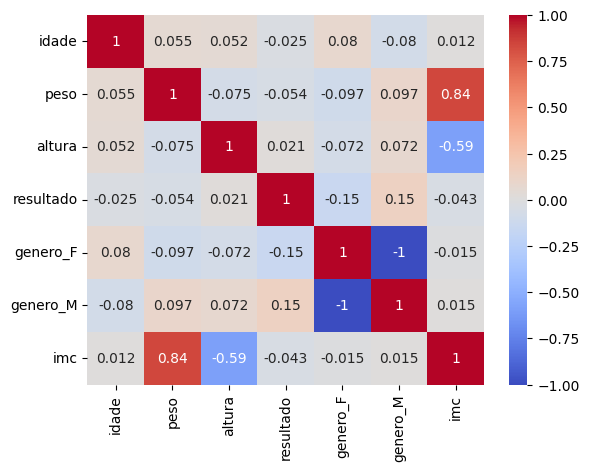

In [34]:
# Apresentar Mapa de Calor com Correlação entre as variáveis
sns.heatmap(df_exames.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

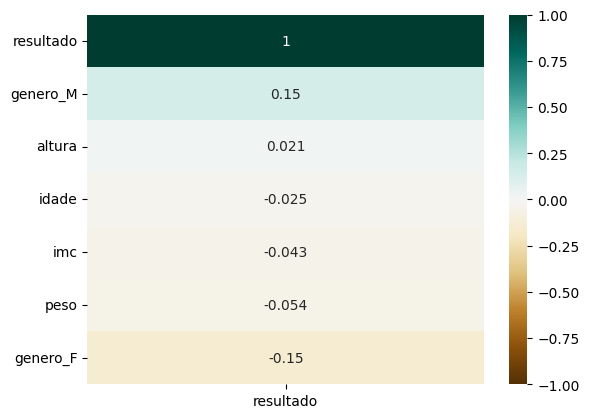

In [35]:
# Mapa de Correlação só com a variável target (resultado)
sns.heatmap(df_exames.corr()[['resultado']].sort_values(by='resultado', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

[[<Axes: xlabel='idade', ylabel='idade'>
  <Axes: xlabel='peso', ylabel='idade'>
  <Axes: xlabel='altura', ylabel='idade'>
  <Axes: xlabel='resultado', ylabel='idade'>
  <Axes: xlabel='genero_F', ylabel='idade'>
  <Axes: xlabel='genero_M', ylabel='idade'>
  <Axes: xlabel='imc', ylabel='idade'>]
 [<Axes: xlabel='idade', ylabel='peso'>
  <Axes: xlabel='peso', ylabel='peso'>
  <Axes: xlabel='altura', ylabel='peso'>
  <Axes: xlabel='resultado', ylabel='peso'>
  <Axes: xlabel='genero_F', ylabel='peso'>
  <Axes: xlabel='genero_M', ylabel='peso'>
  <Axes: xlabel='imc', ylabel='peso'>]
 [<Axes: xlabel='idade', ylabel='altura'>
  <Axes: xlabel='peso', ylabel='altura'>
  <Axes: xlabel='altura', ylabel='altura'>
  <Axes: xlabel='resultado', ylabel='altura'>
  <Axes: xlabel='genero_F', ylabel='altura'>
  <Axes: xlabel='genero_M', ylabel='altura'>
  <Axes: xlabel='imc', ylabel='altura'>]
 [<Axes: xlabel='idade', ylabel='resultado'>
  <Axes: xlabel='peso', ylabel='resultado'>
  <Axes: xlabel='altura

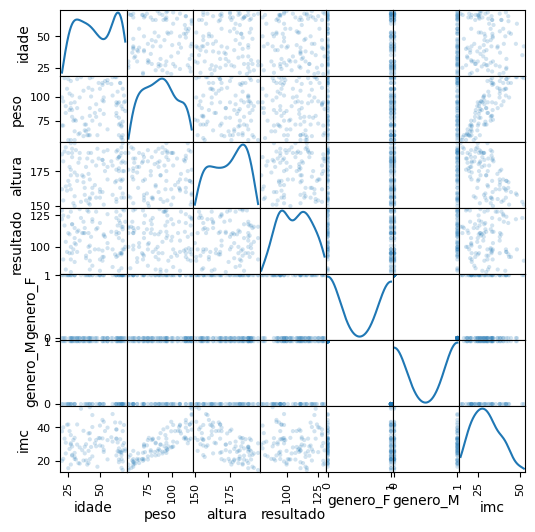

In [36]:
# Plot de Scatter (dispersão) com Distribuição
print(pd.plotting.scatter_matrix(df_exames, alpha=0.2, figsize=(6, 6), diagonal='kde'))

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

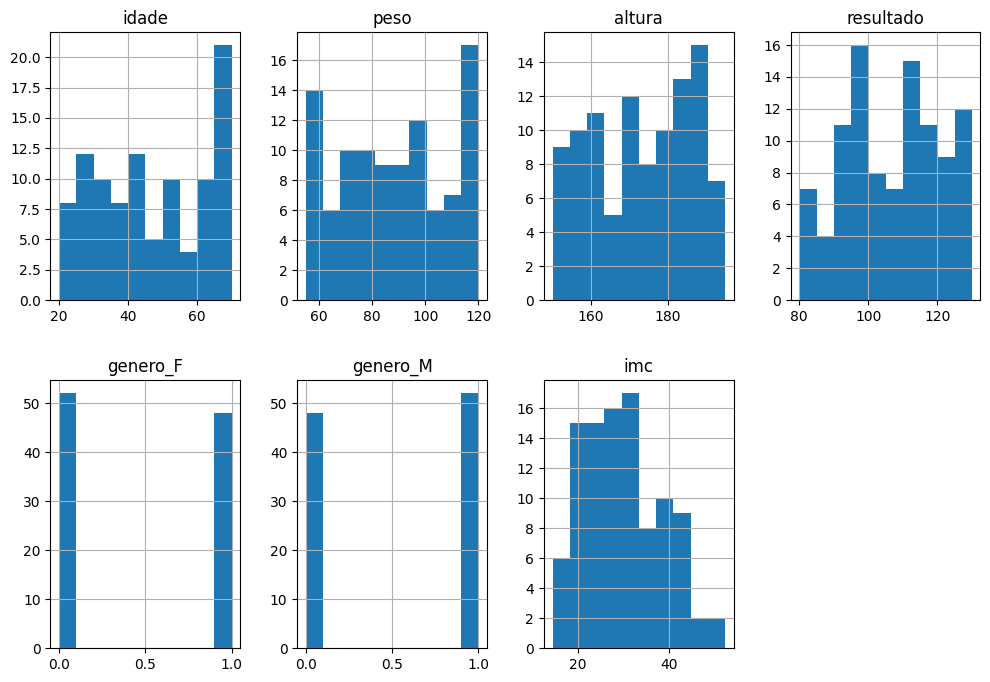

In [39]:
df_exames.hist(layout=(2, 4), figsize=(12, 8))

In [31]:
# Criar uma feature nova
# IMC (Índice de Massa Corporal) = peso / altura^2
df_exames['imc'] = (df_exames['peso'] / ((df_exames['altura'] / 100) ** 2))

In [32]:
df_exames.head()

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682


In [33]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   idade      100 non-null    int64  
 1   peso       100 non-null    int64  
 2   altura     100 non-null    int64  
 3   resultado  100 non-null    int64  
 4   genero_F   100 non-null    int64  
 5   genero_M   100 non-null    int64  
 6   imc        100 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 5.6 KB


In [40]:
dict_regressao = {
  'tempo_casa': [1, 3, 6, 9, 10, 14, 18],
  'salario': [1500, 3000, 4500, 6000, 7000, 8500, 10000]
}

In [41]:
df_regressao_simples = pd.DataFrame(dict_regressao)

In [42]:
df_regressao_simples

,tempo_casa,salario
0,1,1500
1,3,3000
2,6,4500
3,9,6000
4,10,7000
5,14,8500
6,18,10000


<Axes: xlabel='tempo_casa', ylabel='salario'>

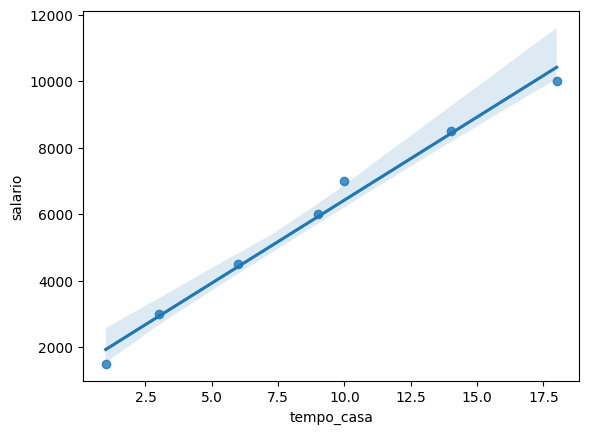

In [43]:
sns.regplot(data=df_regressao_simples, x='tempo_casa', y='salario')

In [ ]:
# y = ax + b

In [45]:
# Importar bibliotecas do sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [49]:
# Modelo 1 sem IMC
X = df_exames.drop(['imc', 'resultado'], axis=1)
y = df_exames['resultado']

In [61]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [62]:
# Treinar o algoritmo de Regressão linear - Modelo 1
model_1 = LinearRegression().fit(X_train, y_train)

In [63]:
# Gerar Predições do conjunto de teste com base no modelo 1
y_pred = model_1.predict(X_test)

In [64]:
# Equação da reta - Regressão Linear
# y = ax + b
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [65]:
model_1.intercept_

94.21133142019875

In [68]:
# R2 Score
model_1.score(X_test, y_test)

-0.1364090447910642

In [69]:
r2_score(y_test, y_pred)

-0.1364090447910642

In [70]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, y_pred)

12.695569181179541

In [72]:
# Segundo modelo - Apenas IMC
X = pd.DataFrame(df_exames['imc'])
y = df_exames['resultado']

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

# Treinar o algoritmo de Regressão linear - Modelo 2
model_2 = LinearRegression().fit(X_train, y_train)

# Gerar Predições do conjunto de teste com base no modelo 2
y_pred = model_2.predict(X_test)

# R2 Score
model_2.score(X_test, y_test)

r2_score(y_test, y_pred)

-0.08898328562401758

In [73]:
# MAE - Mean Absolute Error
mean_absolute_error(y_test, y_pred)

12.5056514070601

In [75]:
model_2.coef_, model_2.intercept_

(array([-0.21677589]), 112.15019229088837)

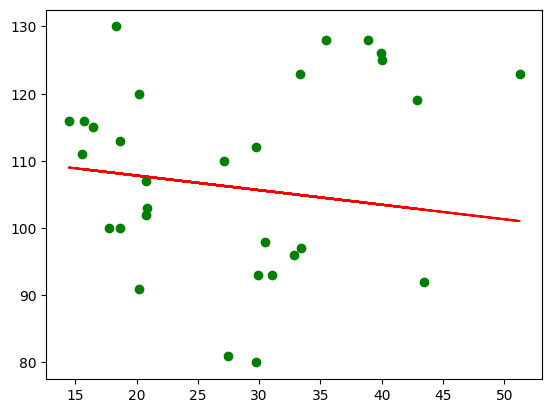

In [77]:
# Mostrar como a reta foi ajustada
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, y_pred, color='r')